In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('data_clean_removed.csv')

In [19]:
data.drop(["Unnamed: 0"],inplace= True,axis = 1)

In [20]:
data.head(5)

,Price,Space,Rooms,Market,Year,elevator,Parking place,balkon,taras,ogródek,district,street,level,max_level
0,4000000.0,560.00,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
1,4000000.0,560.00,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
2,21350100.0,487.75,10,wtórny,2021,1,1,0,0,0,Śródmieście,Elektryczna,6,6
3,19900000.0,487.00,6,wtórny,2001,1,1,0,0,0,Mokotów,Cybulskiego,5,5
4,795900.0,445.00,2,pierwotny,2022,1,1,0,0,0,Praga-Południe,Gocław,4,8


In [21]:
from pycaret.regression import *
setup = setup(data, target = 'Price')

,Description,Value
0,session_id,5650
1,Target,Price
2,Original Data,"(5930, 14)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4150, 1537)"


In [22]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,118460.6360,199792543084.8897,411819.7407,0.7230,0.1644,0.1018,3.2440
et,Extra Trees Regressor,110331.3796,193601877946.1105,400513.5030,0.7076,0.1592,0.0943,5.7760
gbr,Gradient Boosting Regressor,151191.4834,204169584794.0190,420612.8470,0.7014,0.1916,0.1463,1.6050
ridge,Ridge Regression,186383.6672,222060999065.6000,448310.5922,0.6742,0.3212,0.2020,0.1200
br,Bayesian Ridge,186665.3132,230358637454.9495,457072.6095,0.6551,0.3175,0.2014,8.4870
huber,Huber Regressor,180663.5848,306750396211.1058,513570.9396,0.6188,0.2294,0.1666,8.8080
llar,Lasso Least Angle Regression,176556.0368,252620601250.0896,479629.3755,0.5839,0.2598,0.1781,0.3840
en,Elastic Net,227142.9391,300301891174.4000,520259.4094,0.5822,0.3268,0.2382,1.1390
dt,Decision Tree Regressor,142219.6689,270309808478.7404,492968.6214,0.5753,0.2074,0.1209,0.1030
omp,Orthogonal Matching Pursuit,181540.0558,257192515963.1412,485786.0917,0.5715,0.2694,0.1861,0.1150


 Random Forest Regressor (rf) and Extra Trees Regressor (et) are the most promising model. I will follow with evaluating them.


In [24]:
print(best)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5650, verbose=0, warm_start=False)


In [25]:
two_best = compare_models(n_select = 2,include =['rf','et','gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,118460.6360,199792543084.8897,411819.7407,0.7230,0.1644,0.1018,3.2070
et,Extra Trees Regressor,110331.3796,193601877946.1105,400513.5030,0.7076,0.1592,0.0943,5.7980
gbr,Gradient Boosting Regressor,151191.4834,204169584794.0190,420612.8470,0.7014,0.1916,0.1463,1.5510


In [23]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

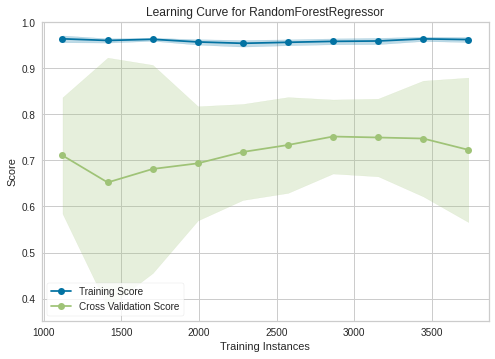

In [28]:
plot_model(best, plot = 'learning')

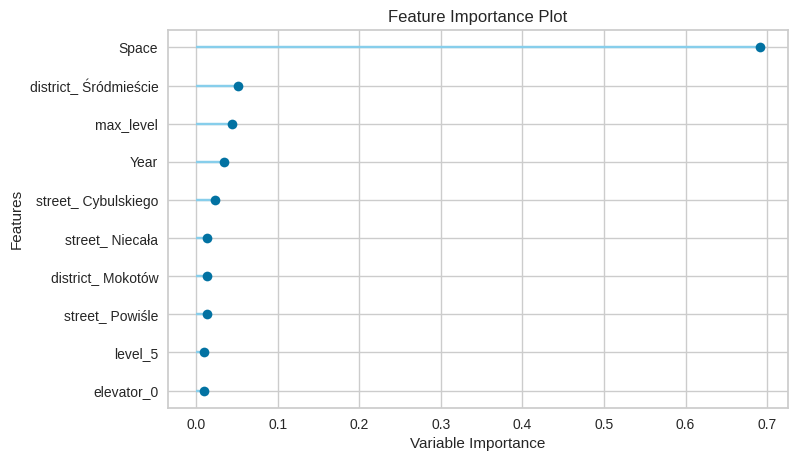

In [29]:
plot_model(best, plot = 'feature')

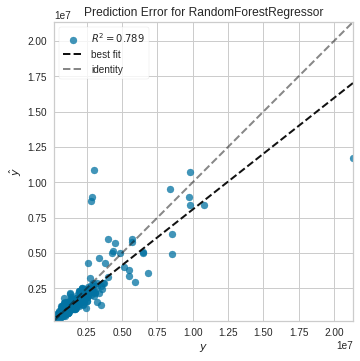

In [30]:
plot_model(best, plot = 'error')

In [31]:
RandomForestRegressor_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,146482.4334,231847930222.9938,481505.8984,0.7747,0.1740,0.1142
1,119631.0100,77350847549.7943,278120.2034,0.8618,0.1599,0.1106
2,124609.8004,82291816129.8373,286865.5018,0.7107,0.1935,0.1311
3,139323.3381,211374724423.2090,459755.0700,0.1906,0.1954,0.1340
4,140336.5351,477818753876.2419,691244.3518,0.6286,0.1641,0.1152
5,146398.7754,153606266321.2870,391926.3532,0.6338,0.1851,0.1251
6,119251.0234,77336208960.7613,278093.8852,0.8336,0.1697,0.1170
7,153869.8408,270248657092.7020,519854.4576,0.6511,0.2063,0.1383
8,121778.7811,76571600515.4273,276715.7396,0.8511,0.1742,0.1193
9,155024.9282,535184539857.9646,731563.0799,0.6755,0.1589,0.1016


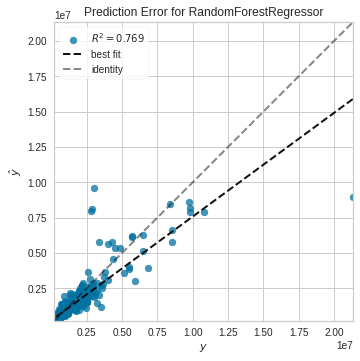

In [34]:
plot_model(RandomForestRegressor_best,plot = 'error')

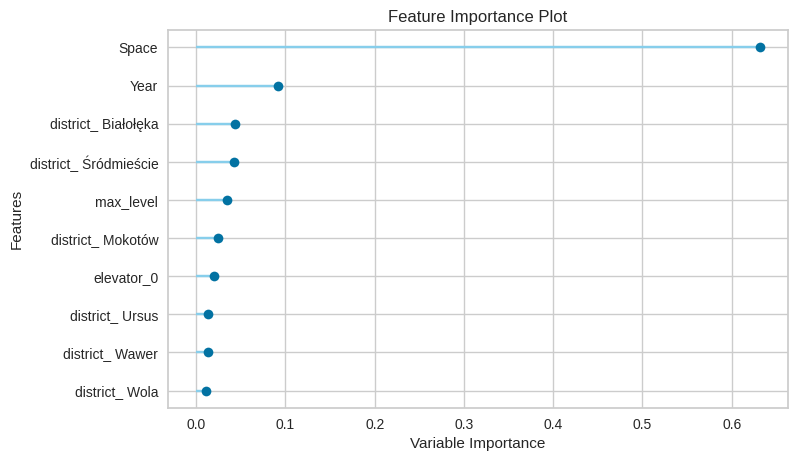

In [35]:
plot_model(RandomForestRegressor_best, plot = 'feature')

In [ ]:
plot_model(RandomForestRegressor_best, plot = 'rfe')

IntProgress(value=0, description='Processing: ', max=5)

In [ ]:
#final_RandomForestRegressor_best = finalize_model(RandomForestRegressor_best)
#deploy_model(final_RandomForestRegressor_best, model_name = 'RandomForestRegressor', platform = 'aws', authentication = { 'bucket'  : 'pycaret-test' })

In [ ]:
save_model(RandomForestRegressor_best, 'RandomForestRegressor_best')

In [32]:
RandomForestRegressor_best_bagged = ensemble_model(RandomForestRegressor_best, fold = 5,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,136173.7766,194929895547.5838,441508.6585,0.7547,0.1701,0.1168
1,131617.5260,95156263608.5788,308474.0890,0.6519,0.1921,0.1360
2,145703.5304,283789759780.7354,532719.2129,0.6673,0.1774,0.1271
3,146058.2464,175140293494.0952,418497.6625,0.7174,0.1962,0.1350
4,149211.5030,362031328360.1811,601690.3924,0.6657,0.1746,0.1179
Mean,141752.9165,222209508158.2349,460578.0031,0.6914,0.1821,0.1266
SD,6687.7002,92135209315.8274,100386.3100,0.0387,0.0102,0.0081


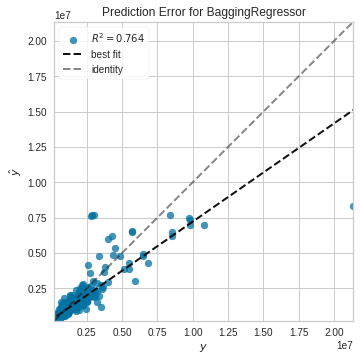

In [33]:
plot_model(RandomForestRegressor_best_bagged,plot = 'error')